<a href="https://colab.research.google.com/github/Mariannly/ISYA2025/blob/main/Python_for_Astrophysics/4_tutorial_py4astro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Astropy Toolkit and Image Processing - MV

In this lecture we will look into astropy, astro imaging and YT examples.

The package is here: https://www.astropy.org

## 1. Units and Physical Constants:

The `units` sub-package allows you to attach physical units to your numerical values, ensuring that calculations are dimensionally consistent and conversions are handled automatically. It also provides access to a vast library of astronomical and physical constants.


https://docs.astropy.org/en/stable/units/index.html

In [1]:
# Importing libraries
from astropy import units as u
from astropy import constants as const

In [2]:
# Light-years
distance_ly = 4.2 * u.lightyear
print(f"Distance in light-years: {distance_ly}")

Distance in light-years: 4.2 lyr


In [3]:
# Solar mass
sun_mass = 1.e6 * u.M_sun
print(f"Mass of the Sun: {sun_mass}")

Mass of the Sun: 1000000.0 solMass


In [4]:
# Planck constant
h = const.h
print(f"Planck constant in SI units (h): {h}")

Planck constant in SI units (h): 6.62607015e-34 J s


## 2. Celestial Coordinates and Times:
- It allows to define positions in various celestial coordinate systems (e.g., ICRS, Galactic) and transform between them, accounting for observer location and time.


- It supports different astronomical timescales (UTC, TAI, TT, TDB) and allows an easy conversion between various date formats, crucial for accurate observations and data stamping.

https://docs.astropy.org/en/stable/coordinates/index.html

https://docs.astropy.org/en/stable/time/index.html


In [5]:
from astropy.coordinates import SkyCoord, ICRS, Galactic

In [6]:
# The Andromeda Galaxy (M31) coordinates in ICRS
m31_icrs = SkyCoord(ra=10.6847 * u.degree, dec=41.2690 * u.degree, frame='icrs')
print(f"M31 in ICRS: {m31_icrs}")

M31 in ICRS: <SkyCoord (ICRS): (ra, dec) in deg
    (10.6847, 41.269)>


In [7]:
# Transform M31 from ICRS to Galactic coordinates
m31_galactic = m31_icrs.transform_to(Galactic())
print(f"\nM31 (ICRS -> Galactic): {m31_galactic}")


M31 (ICRS -> Galactic): <SkyCoord (Galactic): (l, b) in deg
    (121.1743321, -21.57305874)>


### Example: Where will the Moon be tonight over Yachay Tech?

In [8]:
# Import libraries
from astropy.coordinates import EarthLocation, get_body, AltAz
from astropy.time import Time
import numpy as np

In [9]:
# Define the observer's location (Urcuqui, Ecuador)
urcuqui_location = EarthLocation(lat=+10.6410 * u.deg, lon=71.6074 * u.deg, height=6 * u.m)
print(f"Observer Location: {urcuqui_location.geodetic}")

Observer Location: GeodeticLocation(lon=<Longitude 71.6074 deg>, lat=<Latitude 10.641 deg>, height=<Quantity 6. m>)


In [10]:
# Define the current observation time
current_time = Time.now() # This gets the current UTC time
print(f"Current Observation Time (UTC): {current_time.isot}")

Current Observation Time (UTC): 2025-07-10T20:18:17.589


In [11]:
# The get_body()function requires the body name (as a string) and a Time object.
# It returns an ICRS SkyCoord object.
moon_icrs = get_body('moon', current_time)
print(f"\nMoon's ICRS coordinates: {moon_icrs}")


Moon's ICRS coordinates: <SkyCoord (GCRS: obstime=2025-07-10 20:18:17.588546, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (290.50438626, -26.58821871, 0.00261218)>


In [12]:
# Create an AltAz frame specific to our location and time
moon_altaz_frame = AltAz(obstime=current_time, location=urcuqui_location)

In [13]:
# Transform the Moon's ICRS coordinates to our AltAz frame
moon_altaz = moon_icrs.transform_to(moon_altaz_frame)

In [14]:
# Print the Moon's altitude and azimuth
print(f"\nThe Moon's position from Urcuqui at {current_time.to_value('iso', subfmt='date_hms')}:")
print(f"  Altitude: {moon_altaz.alt.to(u.deg):.2f}")
print(f"  Azimuth: {moon_altaz.az.to(u.deg):.2f}")


The Moon's position from Urcuqui at 2025-07-10 20:18:17.589:
  Altitude: 49.71 deg
  Azimuth: 200.23 deg


In [15]:
# You can also check if the Moon is above the horizon
if moon_altaz.alt > 0 * u.deg:
    print("The Moon is currently above the horizon.")
else:
    print("The Moon is currently below the horizon.")

The Moon is currently above the horizon.


## 3. Data Handling:

Astropy provides tools for reading, writing, and manipulating common astronomical data formats like FITS files and tabular data.

In [16]:
from astropy.io import fits
from astropy.utils.data import download_file
from astropy.visualization import astropy_mpl_style, ImageNormalize, SqrtStretch
import matplotlib.pyplot as plt

In [17]:
# Download a sample FITS file (Horsehead Nebula)
# This will download the file to a cache directory
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True)

In [18]:
# Open the FITS file
with fits.open(image_file) as hdu1:
    # Take the first channel (some images have more than 1 channel)
    data = hdu1[0].data # this is a numpy array
    header = hdu1[0].header # this contains the metadata

In [19]:
#print(header)
#print(type(data))
#print(data.shape)

## 4. Visualisation: Galaxy Imaging

### Image in pixels

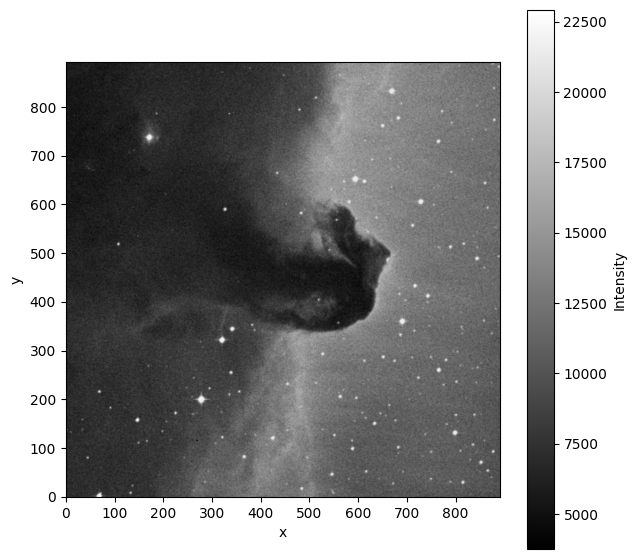

In [20]:
# Figure environment
plt.figure(figsize=(7, 7))

#plt.title('Horsehead Nebula')

plt.imshow(data, cmap='gray', origin='lower') # 'origin=lower' is common for FITS images

# Add colour bar
plt.colorbar(label='Intensity')

# Axis labels
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Image in astronomical WCS coordinates

World Coordinate System (WCS): https://docs.astropy.org/en/latest/wcs/index.html

In [21]:
from astropy.wcs import WCS

In [22]:
# Create a WCS object from the FITS header
wcs = WCS(header)

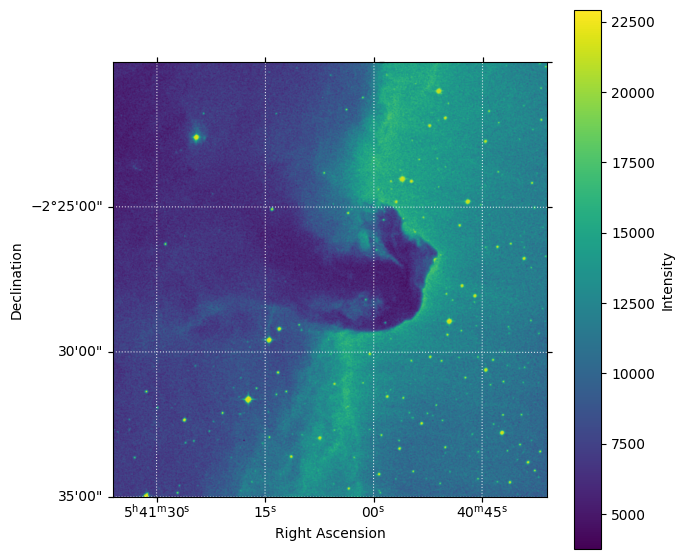

In [23]:
# New figure environment
fig = plt.figure(figsize=(7, 7))

#plt.title('Horsehead Nebula')
ax = fig.add_subplot(111, projection=wcs)

# Display image
im = ax.imshow(data, cmap='viridis', origin='lower')

# Celestial coordinate grid lines and labels
ax.coords.grid(True, color='white', linestyle='dotted', alpha=0.8) # Add grid lines
ax.coords[0].set_axislabel('Right Ascension') # RA axis
ax.coords[1].set_axislabel('Declination')     # Dec axis

# Set formatter for better tick labels (hours/minutes for RA, degrees/arcmin for Dec)
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_major_formatter('dd:mm:ss')

plt.colorbar(im, label='Intensity') # Colorbar needs the image object to correctly map values

plt.show()

### Example: Fetch another image from the Astropy Database:

http://www.astropy.org/astropy-data/

Let's fetch the Hercules Globular Cluster:

https://en.wikipedia.org/wiki/Messier_13

- A globular cluster is a collection of stars bound together by gravity.

- There are more stars towards the globular cluster centre.

In [24]:
# Import libraries
from google.colab import drive

In [25]:
# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Mounted at /content/drive


In [26]:
%cd /content/drive/MyDrive/ISYA 2025/

!mkdir FITS_files

%cd FITS_files

/content/drive/MyDrive/ISYA 2025
mkdir: cannot create directory ‘FITS_files’: File exists
/content/drive/MyDrive/ISYA 2025/FITS_files


In [27]:
# Define the URL of the FITS file
!wget 'http://data.astropy.org/tutorials/FITS-images/M13_blue_0001.fits'

--2025-07-10 20:18:51--  http://data.astropy.org/tutorials/FITS-images/M13_blue_0001.fits
Resolving data.astropy.org (data.astropy.org)... 192.64.119.61
Connecting to data.astropy.org (data.astropy.org)|192.64.119.61|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.astropy.org/astropy-data/tutorials/FITS-images/M13_blue_0001.fits [following]
--2025-07-10 20:18:51--  http://www.astropy.org/astropy-data/tutorials/FITS-images/M13_blue_0001.fits
Resolving www.astropy.org (www.astropy.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to www.astropy.org (www.astropy.org)|185.199.108.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2900160 (2.8M) [image/fits]
Saving to: ‘M13_blue_0001.fits.1’

M13_blue_0001.fits. 100%[===================>]   2.77M  --.-KB/s    in 0.06s   

2025-07-10 20:18:51 (47.5 MB/s) - ‘M13_blue_0001.fits.1’ saved [2900160/2900160]



In [28]:
#!ls -ltr

In [29]:
M13_hdu = fits.open("./M13_blue_0001.fits")

In [30]:
data = M13_hdu[0].data # this is a numpy array
header = M13_hdu[0].header # this contains the metadata

In [31]:
#print(data.shape)

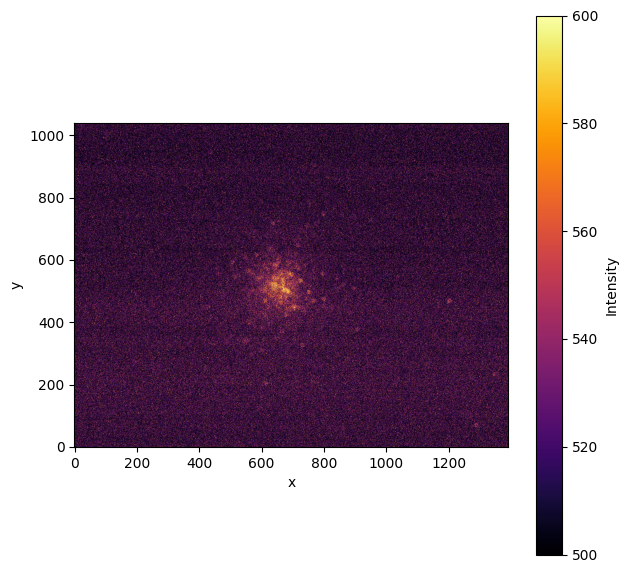

In [32]:
# Figure environment
plt.figure(figsize=(7, 7))

#plt.title('Horsehead Nebula')

plt.imshow(data, cmap='inferno', origin='lower', vmin= 500, vmax = 600) # 'origin=lower' is common for FITS images

# Add colour bar
plt.colorbar(label='Intensity')

# Axis labels
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Exercise: Imaging of galaxies

The purpose of the exercise is to image a galaxy and estimate its diameter.

- Astronomical images come in FITS format: https://en.wikipedia.org/wiki/FITS

- Let's download an image from: https://www2.mpia-hd.mpg.de/THINGS/Data.html

### Reference:

https://ned.ipac.caltech.edu/byname?objname=NGC3184&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [57]:
# Define the URL of the FITS file
!wget 'https://www2.mpia-hd.mpg.de/THINGS/Data_files/NGC_3198_NA_MOM0_THINGS.FITS'

--2025-07-10 20:19:48--  https://www2.mpia-hd.mpg.de/THINGS/Data_files/NGC_3198_NA_MOM0_THINGS.FITS
Resolving www2.mpia-hd.mpg.de (www2.mpia-hd.mpg.de)... 149.217.71.7
Connecting to www2.mpia-hd.mpg.de (www2.mpia-hd.mpg.de)|149.217.71.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4282560 (4.1M) [text/plain]
Saving to: ‘NGC_3198_NA_MOM0_THINGS.FITS’

NGC_3198_NA_MOM0_TH 100%[===================>]   4.08M  1.16MB/s    in 3.5s    

2025-07-10 20:19:53 (1.16 MB/s) - ‘NGC_3198_NA_MOM0_THINGS.FITS’ saved [4282560/4282560]



In [78]:
gal1 = fits.open("./NGC_5236_NA_MOM0_THINGS.FITS")

#print(type(gal1))

In [79]:
# Look at the header
head_gal1 = gal1[0].header
#print(head_gal1)

keys_gal1 = gal1[0].header.keys

#print(keys_gal1)

In [80]:
# Look at the data

data_gal1 = gal1[0].data

#print(type(data_gal1), data_gal1.shape)

In [81]:
# Get data into an image
imag_gal1 = gal1[0].data[0,0,:,:]

#print(imag_gal1.shape)

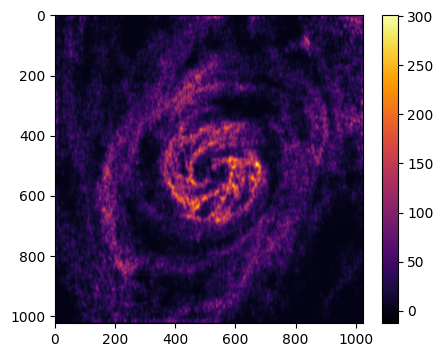

In [82]:
# See the image: Fig Env.

plt.figure(figsize=(5,4))

surf = plt.imshow(imag_gal1, cmap = "inferno")

plt.colorbar(surf)

plt.show()

###  Isolate the galaxy: thresholding (pixel histogram)

In [83]:
# Get # of pixels
#print(imag_gal1.size)

# See min/max
#print(np.min(imag_gal1_1d), np.max(imag_gal1_1d))

In [84]:
# Flatten the 2D image
imag_gal1_1d = imag_gal1.reshape((imag_gal1.size,1))
#imag_gal1_1d = imag_gal1.flatten()

#print(imag_gal1.shape, imag_gal1_1d.shape)

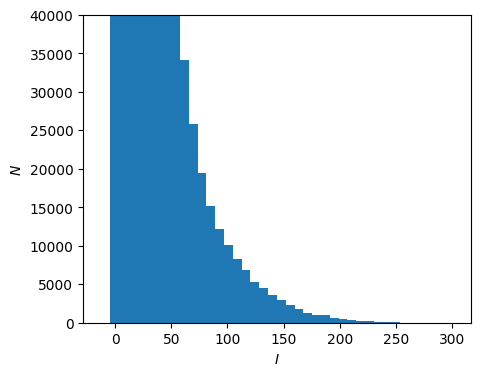

In [85]:
# Make a pixel histogram

plt.figure(figsize=(5,4))

plt.hist(imag_gal1_1d, bins = 40)

plt.xlabel(r"$I$")
plt.ylabel(r"$N$")

plt.ylim(0,40000)
plt.show()

### Thresholding algorithm

In [102]:
# Use thresholding with conditionals

clean_gal1_1d = np.where(imag_gal1_1d < 65., np.nan, imag_gal1_1d)

#print(clean_gal1_1d.shape)

In [103]:
# Reshape to 2D
clean_gal1_2d = clean_gal1_1d.reshape(imag_gal1.shape)

#print(clean_gal1_2d.shape)

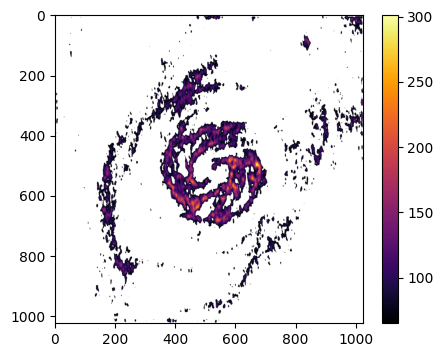

In [104]:
# See the image: Fig Env.

plt.figure(figsize=(5,4))

surf = plt.imshow(clean_gal1_2d, cmap = "inferno")

plt.colorbar(surf)

plt.show()

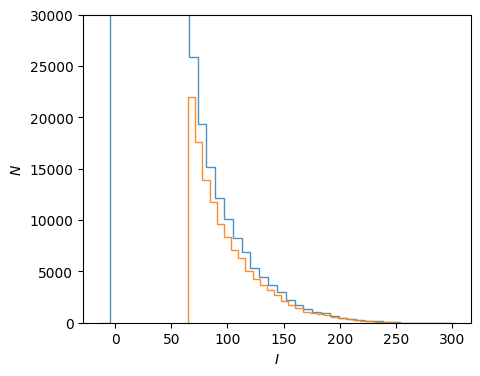

In [105]:
# Compare the pixel histograms

plt.figure(figsize=(5,4))

plt.hist(imag_gal1_1d, bins = 40, alpha = 0.8, histtype="step")
plt.hist(clean_gal1_1d, bins = 37, alpha = 0.9, histtype="step")

plt.xlabel(r"$I$")
plt.ylabel(r"$N$")

plt.ylim(0,30000)
plt.show()

### Making binary map

- 1 -> galaxy
- 0 -> background

In [106]:
# Apply thresholding to the cleaned image

bin_gal1_2d = np.where(clean_gal1_2d > 0., 1., 0.)

#print(bin_gal1_2d.shape, np.unique(bin_gal1_2d))

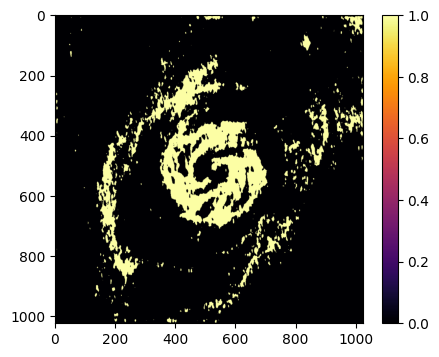

In [107]:
# See the image: Fig Env.

plt.figure(figsize=(5,4))

surf = plt.imshow(bin_gal1_2d, cmap = "inferno")

plt.colorbar(surf)

plt.show()

### Calculating the galaxy diameter using the centroid

https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops

In [108]:
# For thresholding
from skimage import filters

# For calculating the centroid
from skimage.measure import regionprops

In [109]:
# Get the centre of mass of the original image:

# 1. Get a threshold:
# Reference: https://en.wikipedia.org/wiki/Otsu%27s_method (the annimation video illustrates the method quite well).
# The algorithm returns a single intensity threshold that separate pixels into two classes – foreground and background.
# This threshold is determined by minimising intra-class intensity variance or by maximising inter-class variance.

th_value = filters.threshold_otsu(imag_gal1)

#print(th_value)

In [110]:
# 2. Labeled foreground (galaxy itself) -> binary map

labeled_gal1 = (imag_gal1 > th_value).astype(int)

#print(np.unique(labeled_gal1))

In [111]:
# 3. Image features /properties

prop_gal1 = regionprops(labeled_gal1,imag_gal1)

#print(prop_gal1[0].area)
#print(prop_gal1[0].centroid)

cm_gal1 = np.array(prop_gal1[0].centroid)

#print(cm_gal1)

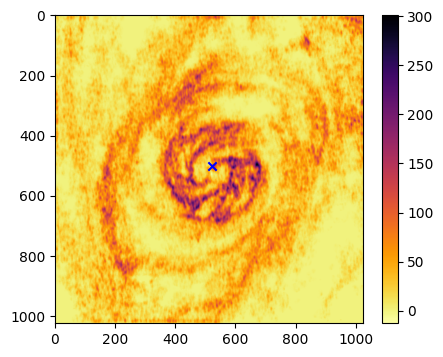

In [112]:
# See the image: Fig Env.

plt.figure(figsize=(5,4))

surf = plt.imshow(imag_gal1, cmap = "inferno_r")

plt.scatter(cm_gal1[1], cm_gal1[0], marker = "x", color = "blue")

plt.colorbar(surf)

plt.show()

In [113]:
# 4. Diameter estimate
#print(prop_gal1[0].axis_major_length)
#print(prop_gal1[0].axis_minor_length)

# Store values for final calculation
dx_v2 = prop_gal1[0].axis_major_length
dy_v2 = prop_gal1[0].axis_minor_length

In [114]:
diam_gal1_v2 = np.mean([dx_v2, dy_v2]) # in pixels

print("The NGC 3184 galaxy diameter in [pixels] is: ", diam_gal1_v2)

The NGC 3184 galaxy diameter in [pixels] is:  861.6495490981313


### Fetch size in physical units:

Use NED's database to research the distance to the galaxy:

https://ned.ipac.caltech.edu/

We also want to use the size of the galaxy on the sky, which is in the header of the FITS file:

CDELT2 = 4.166666768E-04 in degrees

In [115]:
# Pixel resolution ()
pix_res = gal1[0].header["CDELT2"] # in degrees

print("The size of the galaxy on the sky in [degrees] is: ", pix_res)

# Conversion to radians
pix_res_rad = pix_res*np.pi/180.

The size of the galaxy on the sky in [degrees] is:  0.0004166666768


In [116]:
# Distance to the galaxy from NED
dist_gal1 = 12.1e3 # in kpc

# Calculate the diameter:
diam_gal1_phys_v2 = dist_gal1*diam_gal1_v2*np.tan(pix_res_rad)

# Print the result:
print("Diameter in [kpc] of the galaxy is:", diam_gal1_phys_v2)

Diameter in [kpc] of the galaxy is: 75.81971923029369
